**Project: Classifying Iris Flowers with ML Algorithms**


Decision Tree Results:
Accuracy: 0.9111111111111111
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.92      0.80      0.86        15
   virginica       0.82      0.93      0.88        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


kNN Results:
Accuracy: 0.9111111111111111
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45


SVM Results:
Accuracy: 0.9111111111111111
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00 

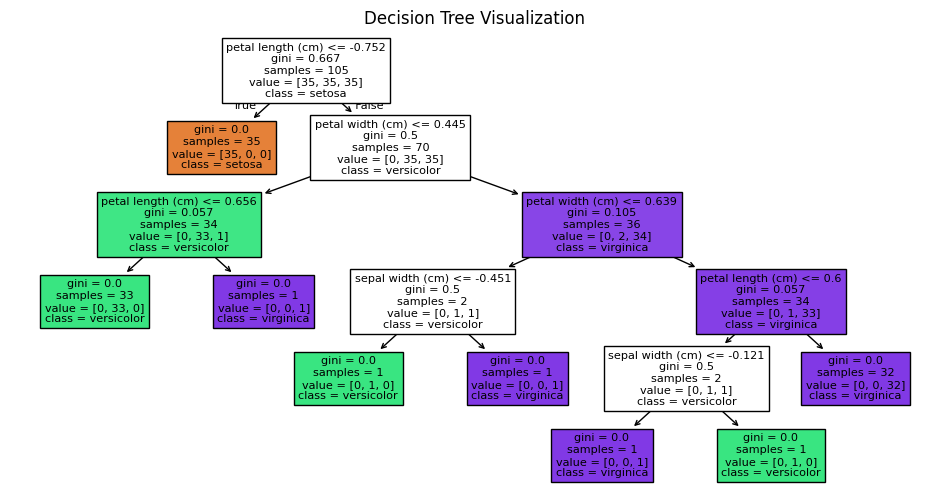

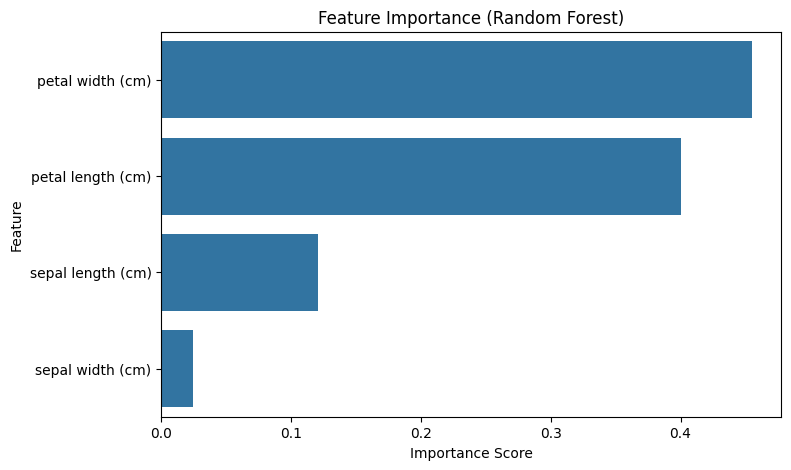

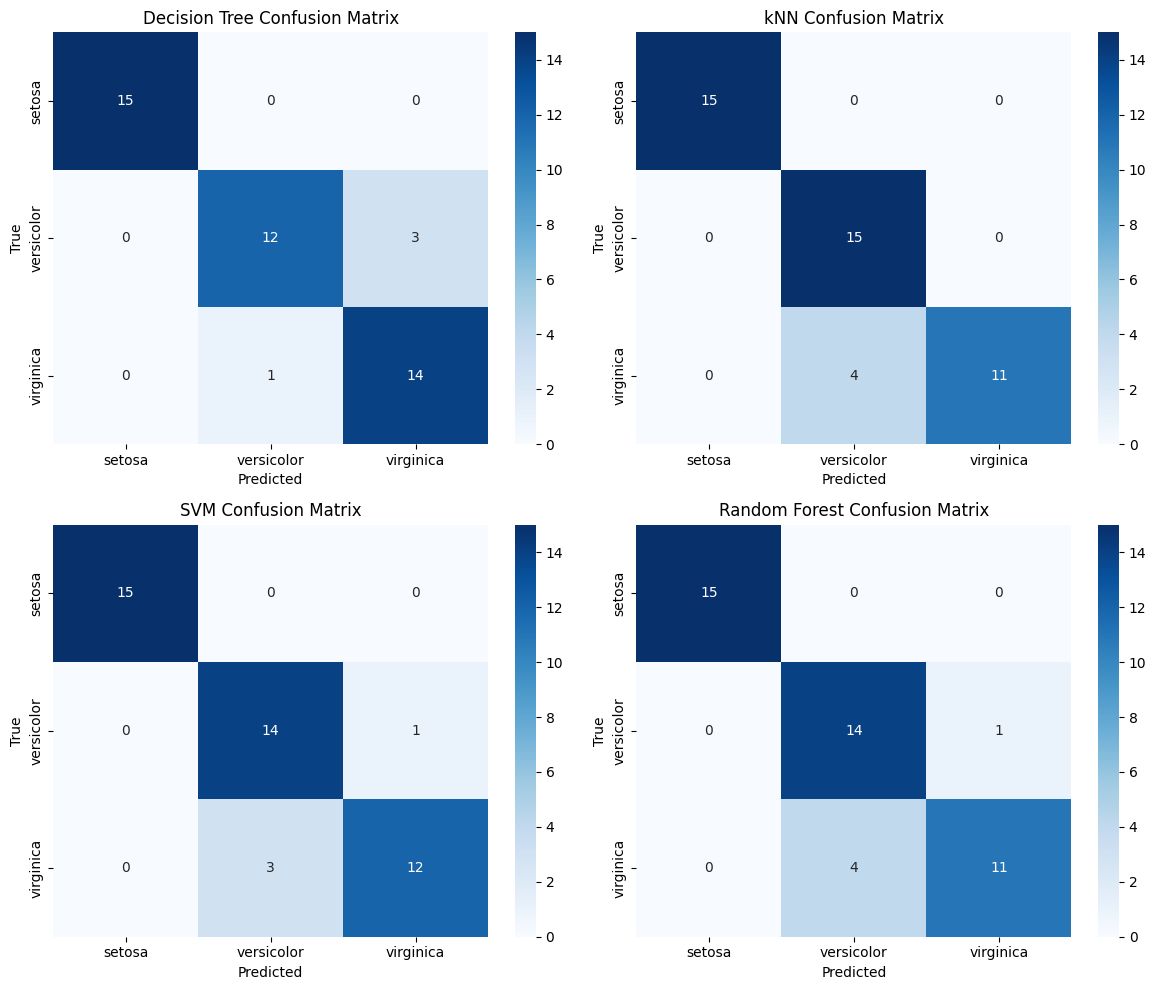

In [2]:
# ====================================================
# Project: Classifying Iris Flowers with ML Algorithms
# ====================================================

# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# 2. Load and prepare dataset
iris = load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Feature scaling (important for kNN & SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Train Models
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 4. Evaluate & Compare Models
models = {
    "Decision Tree": dt,
    "kNN": knn,
    "SVM": svm,
    "Random Forest": rf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=class_names))

# 5. Bias-Variance Tradeoff Demonstration
print("\n=== Bias-Variance Tradeoff with Decision Tree (different depths) ===")
for depth in [1, 3, 5, None]:
    dt_var = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_var.fit(X_train, y_train)
    acc = accuracy_score(y_test, dt_var.predict(X_test))
    print(f"Max Depth={depth}: Accuracy={acc:.3f}")

# 6. Plots & Visualizations
# --------------------------

# (a) Decision Tree Visualization
plt.figure(figsize=(12, 6))
plot_tree(dt, filled=True, feature_names=iris.feature_names, class_names=class_names)
plt.title("Decision Tree Visualization")
plt.show()

# (b) Feature Importance from Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
sns.barplot(x=importances[indices], y=np.array(iris.feature_names)[indices])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# (c) Confusion Matrices for all models
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx],
                xticklabels=class_names, yticklabels=class_names)
    axes[idx].set_title(f"{name} Confusion Matrix")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("True")

plt.tight_layout()
plt.show()
